<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
#!pip install apimoex

In [2]:
import requests
import numpy as np
import apimoex
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt

In [3]:
stock_quotes = ['GAZP', 'YNDX', 'RUAL', 'IRAO', 'GMKN', 'LKOH', 'MGNT', 'MTSS', 'NVTK', 'PLZL', 'ROSN', 'SBER',
               'SNGS', 'TATN','CHMF']

In [4]:
with requests.Session() as session:
    for elem in stock_quotes:
        data = apimoex.get_board_history(session, elem)
        df_2 = pd.DataFrame(data)
        df_2.rename(columns = {'CLOSE':elem}, inplace = True)
        print(elem, df_2['TRADEDATE'][0])

GAZP 2014-06-09
YNDX 2014-06-04
RUAL 2015-03-30
IRAO 2013-07-08
GMKN 2014-06-09
LKOH 2013-03-25
MGNT 2013-07-08
MTSS 2013-07-08
NVTK 2013-03-25
PLZL 2014-06-09
ROSN 2014-06-09
SBER 2013-03-25
SNGS 2014-06-09
TATN 2013-07-08
CHMF 2014-06-09


In [5]:
df = pd.DataFrame({"Date": pd.date_range(start='2015-03-30', freq='1d', end=date.today() - timedelta(days=1))})

In [6]:
df

,Date
0,2015-03-30
1,2015-03-31
2,2015-04-01
3,2015-04-02
4,2015-04-03
...,...
3149,2023-11-12
3150,2023-11-13
3151,2023-11-14
3152,2023-11-15


In [7]:
with requests.Session() as session:
    for elem in stock_quotes:
        data = apimoex.get_board_history(session, elem)
        data = pd.DataFrame(data)
        data.rename(columns = {'CLOSE':elem}, inplace = True)
        data['TRADEDATE'] = pd.to_datetime(data['TRADEDATE'])
        data = data[data['TRADEDATE'] >= '2015-03-30' ]
        df = df.merge(data[[elem, 'TRADEDATE']], left_on='Date', right_on='TRADEDATE', how='outer')
        df = df.drop('TRADEDATE', axis=1)

In [8]:
df

,Date,GAZP,YNDX,RUAL,IRAO,GMKN,LKOH,MGNT,MTSS,NVTK,PLZL,ROSN,SBER,SNGS,TATN,CHMF
0,2015-03-30,137.00,887.0,37.340,1.0450,10530.0,2657.0,11185.0,246.30,432.0,1028.0,247.50,63.01,35.690,278.9,657.00
1,2015-03-31,138.90,893.0,36.790,1.0999,10399.0,2705.0,11350.0,247.00,432.0,1016.5,252.15,62.88,35.100,287.0,658.00
2,2015-04-01,143.00,902.0,35.825,1.1200,10539.0,2755.0,11750.0,250.90,450.3,1028.0,261.35,64.50,35.990,300.1,644.50
3,2015-04-02,143.90,919.0,36.450,1.1034,10090.0,2780.5,11971.0,250.00,467.2,1011.0,262.55,65.92,37.000,301.5,643.00
4,2015-04-03,143.94,940.0,36.720,1.1050,10237.0,2824.8,11799.0,248.60,476.4,1013.0,263.70,65.50,36.690,299.0,641.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,2023-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3150,2023-11-13,167.85,2577.2,39.465,4.2740,17410.0,7277.5,6061.0,278.65,1623.6,11256.0,598.30,283.97,32.305,616.3,1378.80
3151,2023-11-14,165.86,2600.0,39.280,4.2425,17178.0,7200.0,5940.0,273.00,1594.0,11308.5,591.30,280.87,31.580,610.7,1356.80
3152,2023-11-15,166.46,2620.0,39.275,4.2350,17136.0,7224.0,5935.0,277.05,1566.8,11263.0,585.00,282.89,32.060,611.8,1360.00


In [9]:
df = df.dropna()

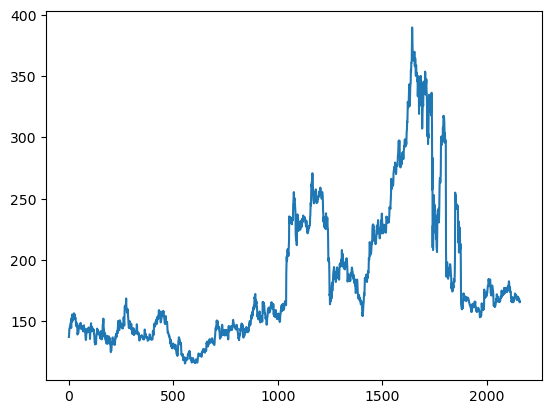

In [10]:
plt.plot(list(df['GAZP']))

In [11]:
df.to_csv("fin_quotes.csv", index=False)